# Estimating errors between two trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import validator as validator
from utils import *
from matplotlib.ticker import MaxNLocator

In [16]:
dist, dist_to_line = distance, distance_to_line

def find_next_focus_point1(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to the two current points (p1 or q1)
    Returns: True if p2 is the next focus point, False if q2
    """
    return min(dist(p2, p1), dist(p2, q1)) < min(dist(q2, p1), dist(q2, q1)) #p2 is the closest point

def find_next_focus_point2(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to its respective point (p1 or q1)
    """
    return dist(p2, p1) < dist(q2, q1) #p2 is the closest point
    
def find_next_focus_point3(p1, p2, q1, q2):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)


def find_next_focus_point4(p1, p2, q1, q2, oldpoint):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    wrong_side = orientation(p1, q1, oldpoint)
    if orientation(p1, q1, p2) == wrong_side:
        return False
    elif orientation(p1, q1, q2) == wrong_side:
        return True
    else:
        return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)

### *Idea 3* - Negative Area

In [19]:
def error_btw_trajectories1(S, T):
    i, j = 0, 0 # i (or j) is the index of the current point along S (or T)
    si, tj = S[i], T[j]
    plt.figure()
    plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    #     plt.axis("equal")
    plt.grid()
    error = 0
    while i < len(S) - 1 and j < len(T) - 1:
        if find_next_focus_point3(si, S[i+1], tj, T[j+1]):
            print("A", triangle_area_oriented(si, tj, S[i+1]))
            error += triangle_area_oriented(si, tj, S[i+1], ax)
#             print(i, j, si, tj, S[i+1], orientation(si, tj, S[i+1]))
            old_point = si
            si, i = S[i+1], i+1
        else:
            print("B", triangle_area_oriented(si, tj, T[j+1]))
            error += triangle_area_oriented(si, tj, T[j+1], ax)
#             print(i, j, si, tj, T[j+1], orientation(si, tj, T[j+1]))
            old_point = tj
            tj, j = T[j+1], j+1
        # Compute area of the triangle old_point, si, tj
#         error += triangle_area(old_point, si, tj, ax)
#       print(i, j, error)
    
    if i == len(S) - 1:
        print("C", triangle_area_oriented(si, tj, T[j+1]))
        error += triangle_area_oriented(si, tj, T[j+1], ax)
        j += 1
        for j in range(j, len(T)-1):
            print("E", triangle_area_oriented(si, T[j], T[j+1]))
            error += triangle_area_oriented(si, T[j], T[j+1], ax)
    elif j == len(T) - 1: #else ?
        print("D", triangle_area_oriented(si, tj, S[i+1]))
        error += triangle_area_oriented(si, tj, S[i+1], ax)
        i += 1
        for i in range(i, len(S)-1):
            print("F", triangle_area_oriented(S[i], tj, S[i+1]))
            error += triangle_area_oriented(S[i], tj, S[i+1], ax)
    plt.show()
    Slen = sum(norm(S[i+1] - S[i]) for i in range(len(S) - 1))
    return error / Slen

SR1.txt	B 3.0
B -2.5
D 12.5


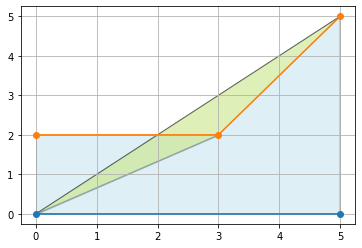

ok 	 The expected value is indeed 2.6

SR2.txt	B 3.0
B 5.0
D 0.0


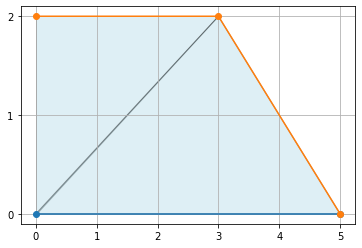

ok 	 The expected value is indeed 1.6

SR3.txt	B 0.5
B 0.0
D 0.0
F 0.5


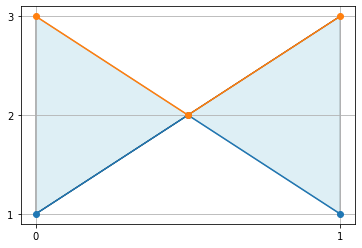

ok 	 The expected value is indeed 0.4472135954999579

SR4.txt	B 1.0
B -4.0
A 2.0
C -1.0


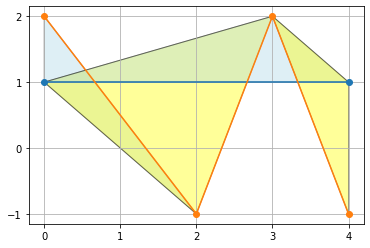

NOT ok 	 The expected value is 0.83, but the output value is -0.5.

SR5.txt	B 0.5
B 1.0
B -4.0
A 2.0
C -1.0
E -1.0


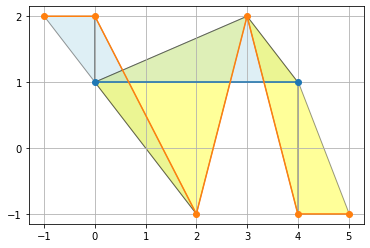

NOT ok 	 The expected value is 1.208, but the output value is -0.625.

SR6.txt	B 0.0
A 0.0
B -1.5
A -2.0
B 3.5
B 0.5
A 4.0
B -1.0
D 2.0


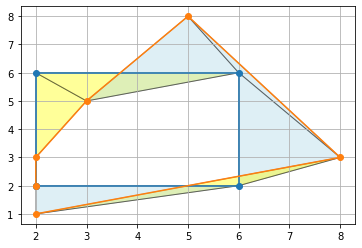

NOT ok 	 The expected value is 0.6325, but the output value is 0.34375.

[test0]simple.txt	B 1.5
A 1.5
B 1.5
A 0.5
B 0.5
A 0.5
B 0.5
D 2.5


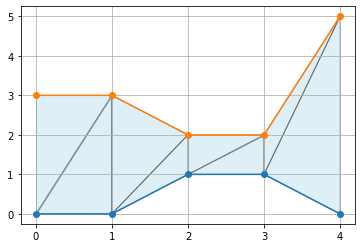

NOT ok 	 The expected value is 1.8639, but the output value is 1.8639610306789278.

[test1]negative.txt	B 1.5
B 1.5
A 1.5
B -1.0
A 3.0
A 1.0
B 1.0
D 1.5


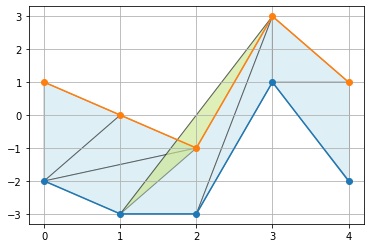

NOT ok 	 The expected value is 1.0309, but the output value is 1.030970684301985.

[test2]simple2.txt	B -5.0
A -6.5
B -8.125
B 1.625
B -5.75
B -0.47499999999999964
D -3.5
F 0.0
F -1.0500000000000003
F -0.55


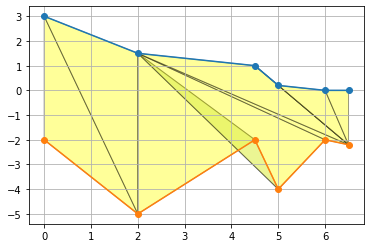

NOT ok 	 The expected value is 3.9033, but the output value is -3.903384142392091.

[test3]intersection.txt	B 2.0
B -3.0
B 8.5
B 5.0
A 7.5
A 0.9000000000000021
B 4.649999999999997
B -2.4000000000000004
D -27.15
F -9.0
F -8.5
F -5.5


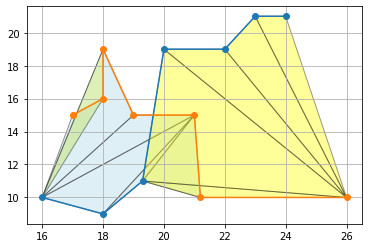

NOT ok 	 The expected value is 3.5442, but the output value is -1.5093854721923945.

[test4]poor_sided.txt	B 3.0
B 1.0
B 5.0
B -4.0
D 12.0


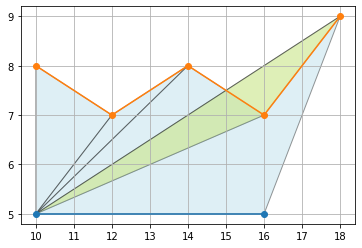

NOT ok 	 The expected value is 2.8333, but the output value is 2.8333333333333335.

[test6].txt	B 0.5
B 0.75
B 1.75
B -0.5
B -0.5
B -3.5
B -1.5
B 1.5
B 5.6
B 0.7000000000000002
B -0.5
B -2.0
B -0.625
B 2.5
D -6.0


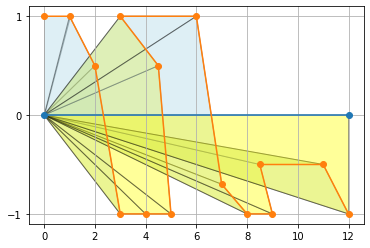

NOT ok 	 The expected value is 0.8122, but the output value is -0.15208333333333335.

[test7].txt	B 0.6499999999999999
B 0.825
A 1.275
B -0.375
B -0.5
B 1.7000000000000002
B 2.4
A 5.75
C -1.5
E -0.75


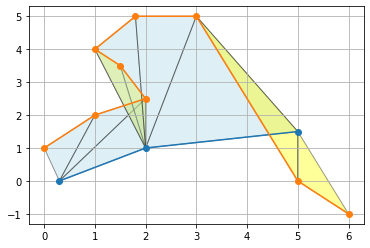

NOT ok 	 The expected value is 2.0329, but the output value is 1.889825824150352.

untitled.txt	B -2.5
B 4.5
B 4.0
D 8.0


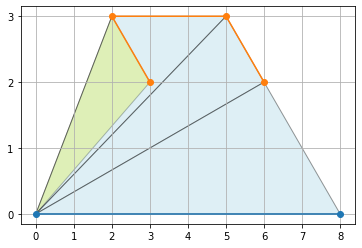

NOT ok 	 The expected value is -1.0, but the output value is 1.75.

untitled1.txt	B -2.0
B 1.0
A -4.0
A -3.0
B 12.0
D 12.0


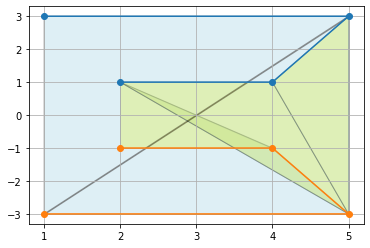

NOT ok 	 The expected value is 2.4283432403227163, but the output value is 1.942674592258173.



False

In [20]:
validator.test(error_btw_trajectories1, samples_range = slice(0, None), dirname = "../indoor-location-oracles/Oracles/")

In [21]:
16/8.23606797749979

1.942674592258173